💳 Credit Card Fraud Detection 💳

In [1]:
import pandas as pd

df = pd.read_csv('archive (7)/creditcard.csv')  

In [2]:
df.shape
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
fraud_count = df['Class'].value_counts()
labels=['Non-Fraud (0)','Fraud(1)']
print(fraud_count)

Class
0    284315
1       492
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x237d75cbb60>,
 [Text(0.8387995545922927, -0.7116286301265369, 'Non-Fraud (0)'),
  Text(-0.8387997864702882, 0.7116283568109123, 'Fraud(1)')],
 [Text(0.45752702977761417, -0.388161070978111, '99.83%'),
  Text(-0.4575271562565208, 0.3881609218968612, '0.17%')])

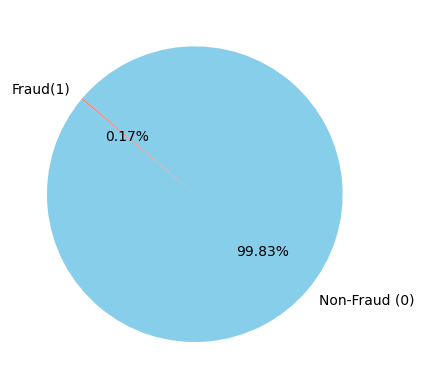

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(fraud_count,labels=labels, autopct='%1.2f%%',colors=['skyblue', 'salmon'],startangle=140)

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_6244\1202826953.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df,palette=['skyblue','salmon'])


<Axes: xlabel='Class', ylabel='count'>

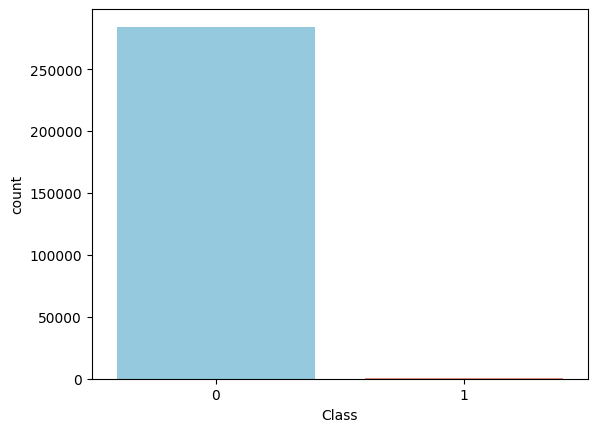

In [6]:
sns.countplot(x='Class',data=df,palette=['skyblue','salmon'])

In [7]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraud_ratio = fraud_count[1]/fraud_count.sum()
print(f"Fraudulent transactions make up: {fraud_ratio*100:.4f}%")

Fraudulent transactions make up: 0.1727%


Imbalance of Dataset

If fraud = only 0.17% of the data, we know:

⚠️ Standard models may perform poorly
🧠 Smart rule-based detection might help

<Axes: xlabel='Time', ylabel='Count'>

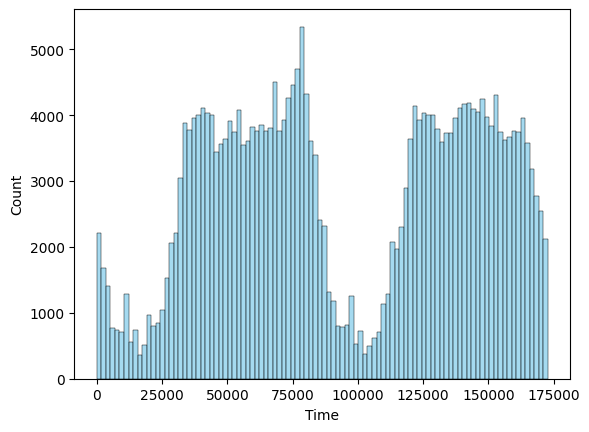

In [9]:
sns.histplot(df[df['Class']==0]['Time'],bins=100, color='skyblue', label='Non-Fraud' )

<Axes: xlabel='Time', ylabel='Count'>

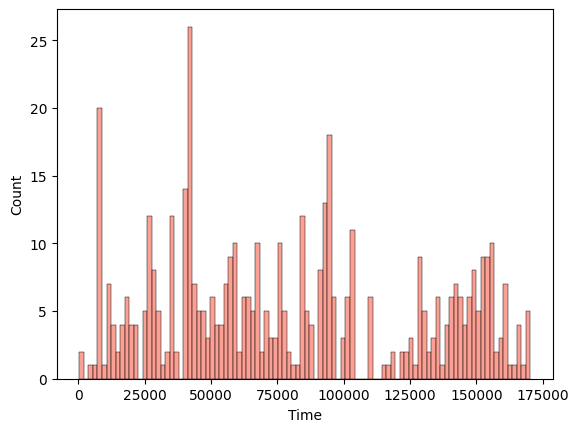

In [10]:
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='salmon', label='Fraud')

Step 5: Transaction Amount vs. Fraud

To see if frauds usually involve small or large amounts.

It can give clues like:

“Fraudsters target small amounts to avoid detection”

or “Large amounts = high-risk transactions”

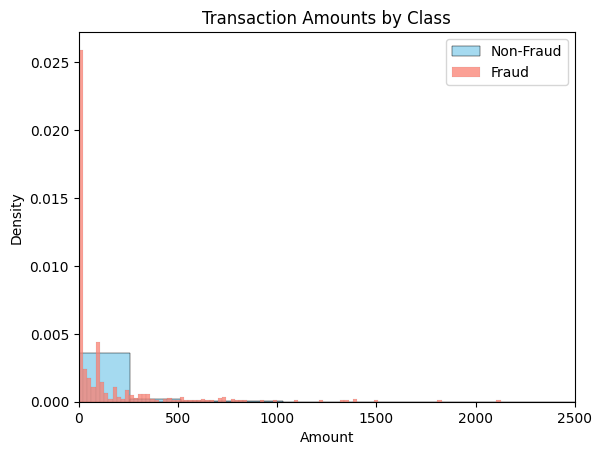

In [11]:
plt.Figure(figsize=(12,6))

sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='skyblue', label='Non-Fraud', stat='density')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='salmon', label='Fraud', stat='density')

plt.legend()
plt.title("Transaction Amounts by Class")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.xlim(0,2500)
plt.show()

Amount of frauds ranges between 100 to 500:
       Fraudsters likely keep amounts low to avoid triggering security systems.

Large amount frauds are less frequent:
       Big fraudulent attempts may get flagged quickly or fail.      

Fraud distribution is spiky...
        Indicates fraud is not randomly spread but happens at specific amount levels. That could mean:

        Fraudsters test the system with fixed amounts.

        Certain transaction patterns or system loopholes are being targeted.        


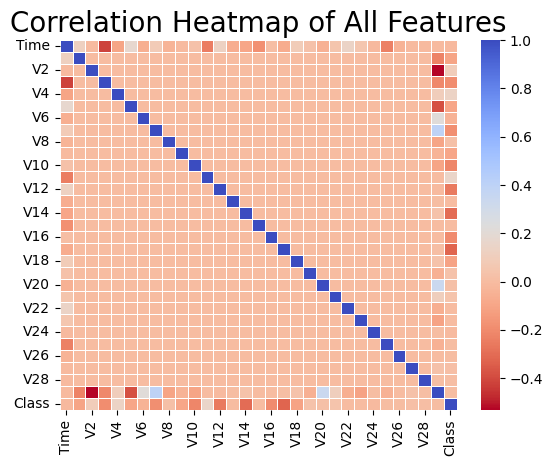

In [12]:
plt.Figure(figsize=(20,15))

corr=df.corr()

sns.heatmap(corr,cmap='coolwarm_r',annot=False,linewidth=0.5)
plt.title("Correlation Heatmap of All Features",fontsize=20)
plt.show()

Look at the last row or column (labeled Class).

Strong red: Strong negative correlation with fraud

Strong blue: Strong positive correlation with fraud
👇
If V17 has a deep red color with Class, it means:
“As the value of V17 decreases, the chances of fraud increase.”

If V11 is light (near white) with Class, it means:
"No meaningful correlation with fraud."

In [13]:
correlations = df.corr()['Class'].drop('Class') 

correlations_sorted = correlations.sort_values(key=lambda x: abs(x), ascending=False)

print("Top features correlated with fraud:\n")
print(correlations_sorted.head(10))  


Top features correlated with fraud:

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64


Negative are strong indicators of fraud...
Positive are useful but less fraud.. 

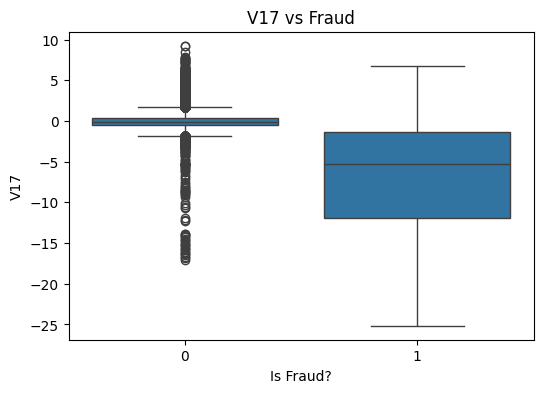

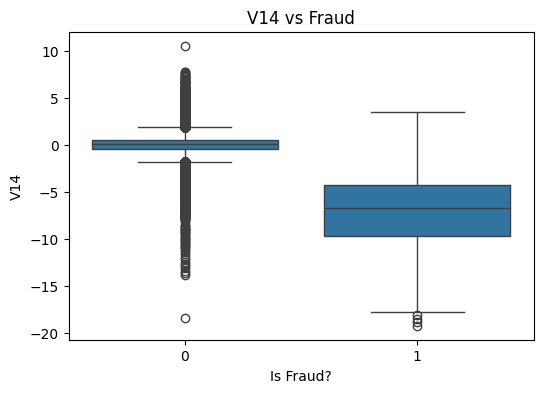

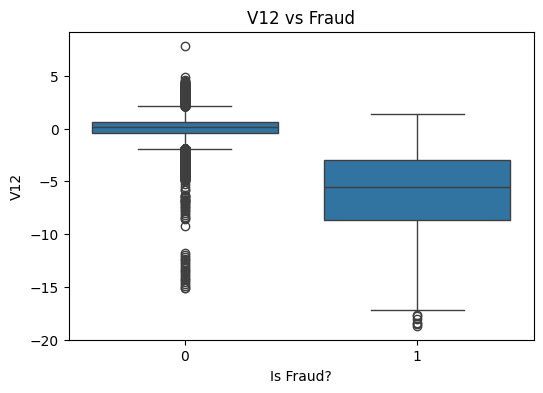

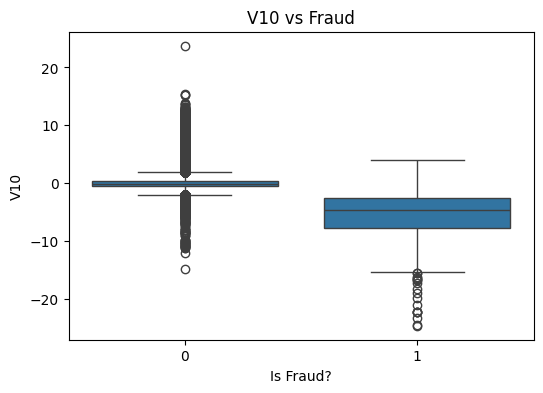

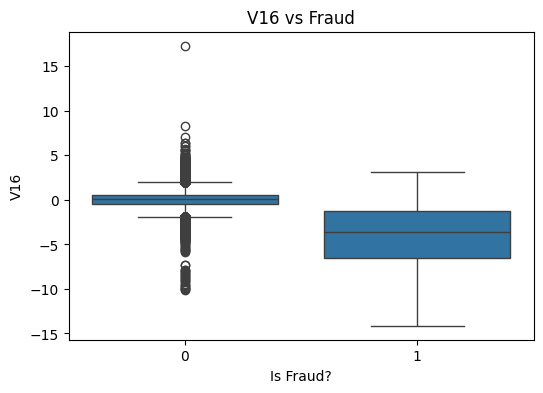

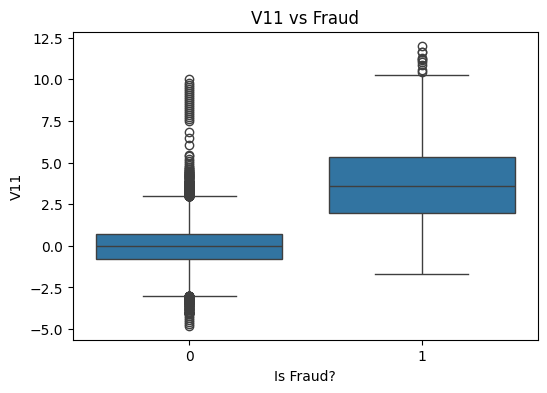

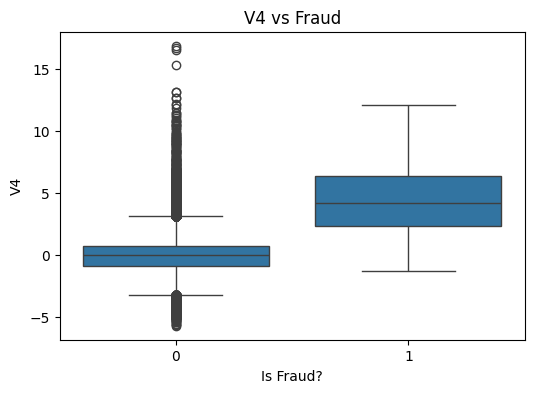

In [14]:
top_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V4']

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Fraud')
    plt.xlabel('Is Fraud?')
    plt.ylabel(feature)
    plt.show()


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_6244\1542481926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_6244\1542481926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_6244\1542481926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_6244\1542481926.py:6: 

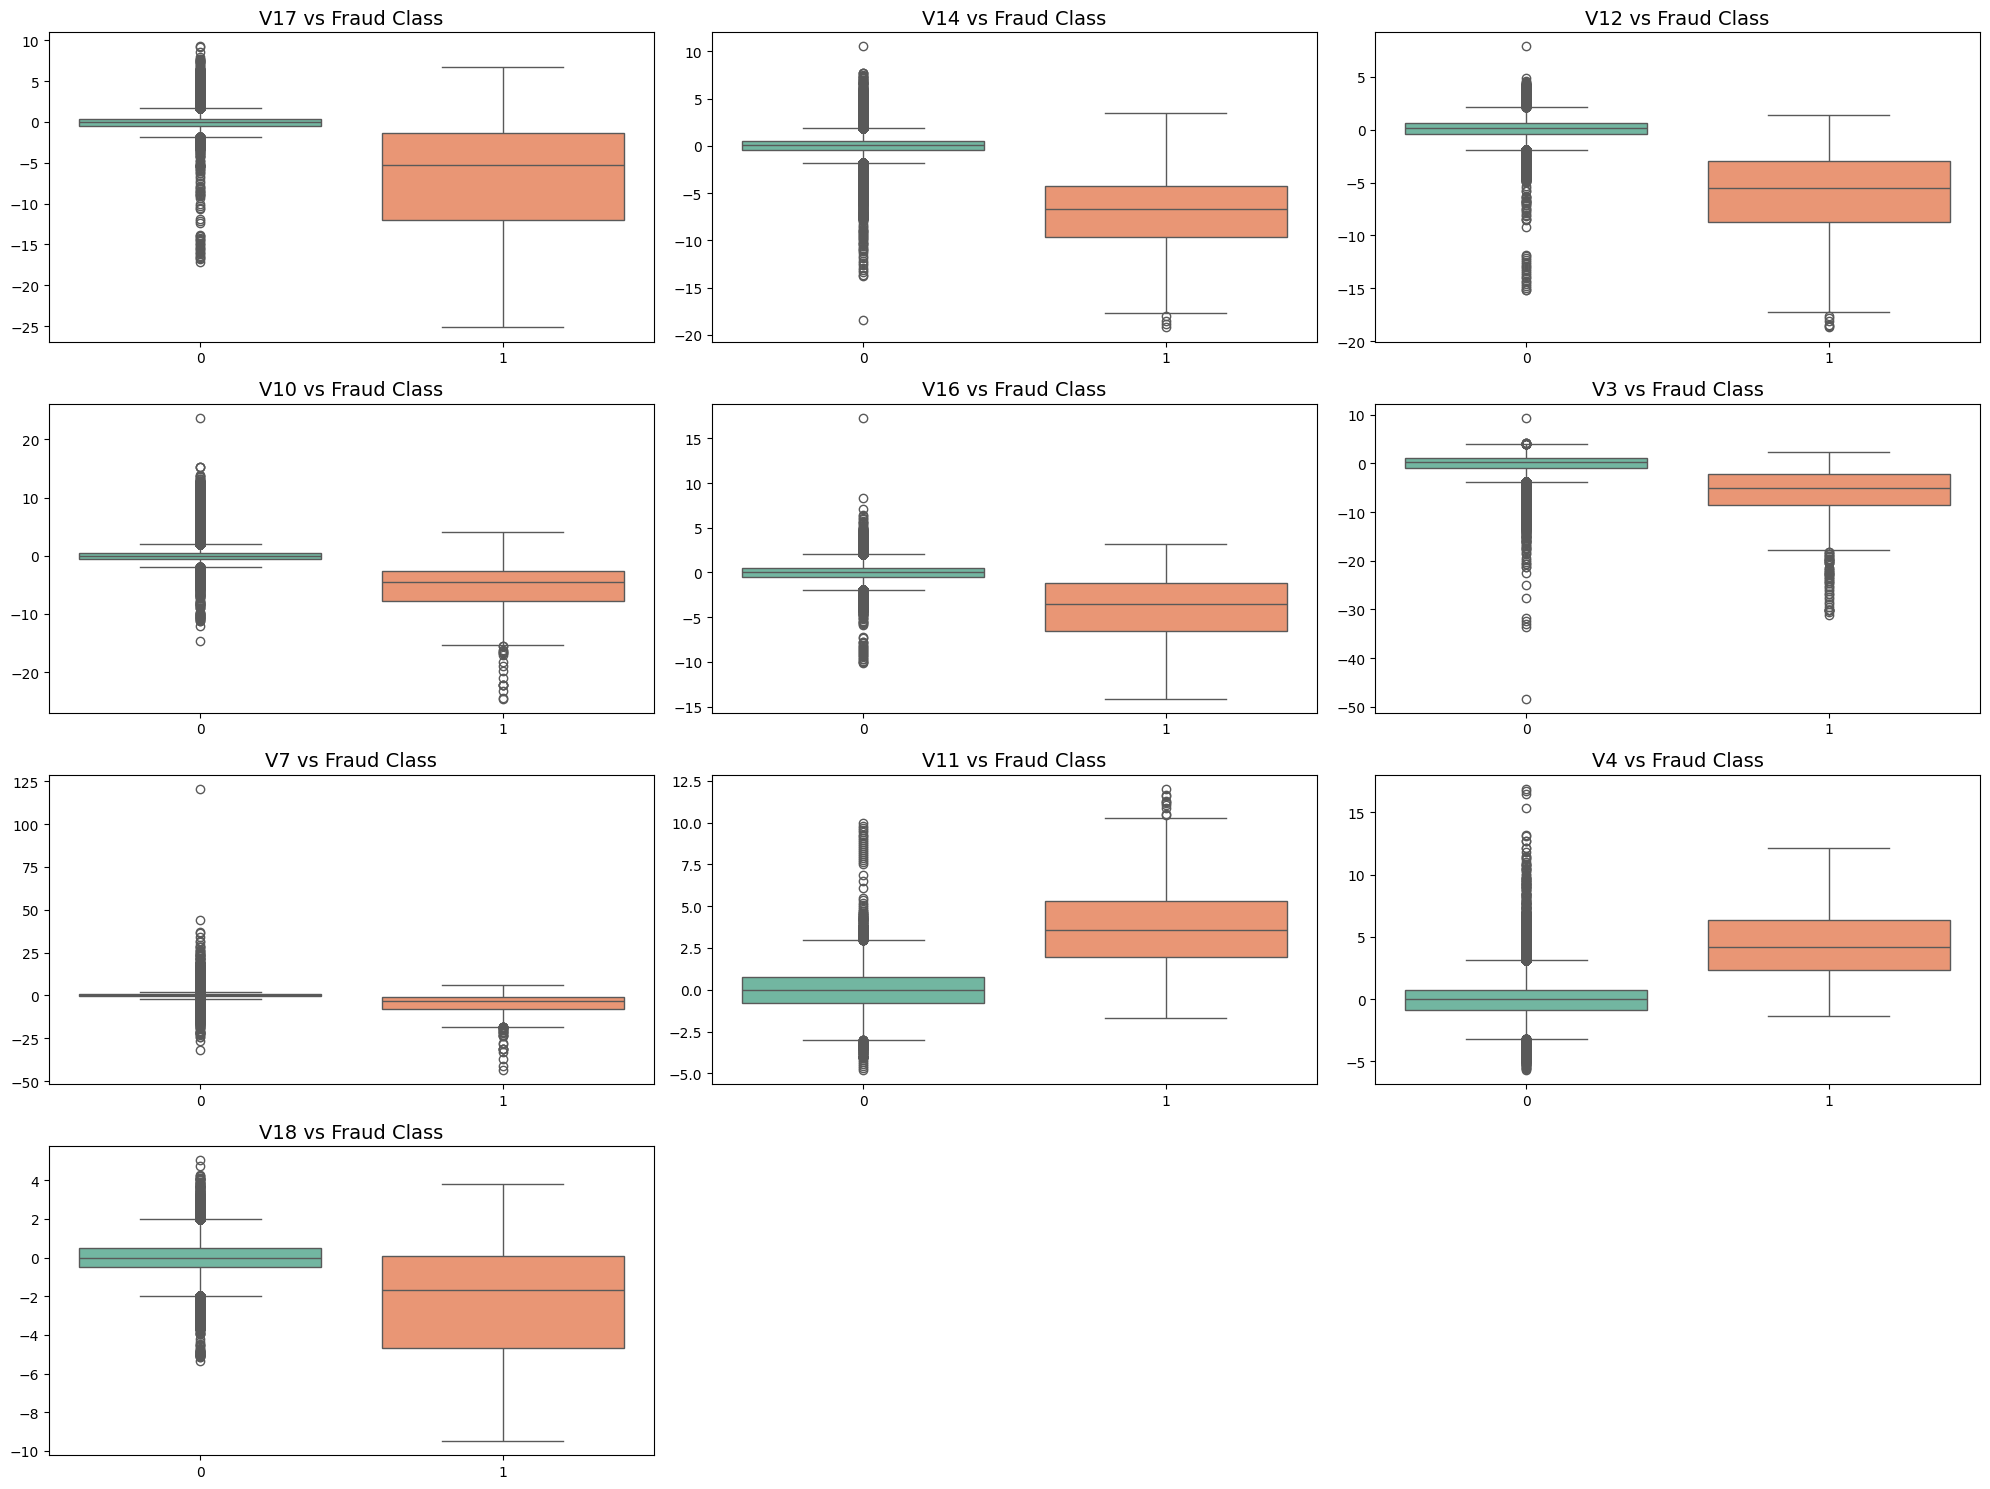

In [15]:
top_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Fraud Class', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [16]:
top_corr_features = ['V17', 'V14', 'V12', 'V10', 'V16']
for col in top_corr_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    fraud_outliers = outliers[outliers['Class'] == 1]
    
    print(f"\nFeature: {col}")
    print(f"Total outliers: {len(outliers)}")
    print(f"Fraudulent outliers: {len(fraud_outliers)}")




Feature: V17
Total outliers: 7420
Fraudulent outliers: 397

Feature: V14
Total outliers: 14149
Fraudulent outliers: 430

Feature: V12
Total outliers: 15348
Fraudulent outliers: 409

Feature: V10
Total outliers: 9496
Fraudulent outliers: 399

Feature: V16
Total outliers: 8184
Fraudulent outliers: 351


Scaling and resampling 

Scaling ensures that all features are on the same range — otherwise, features with larger ranges will dominate the model.

Resampling handles the imbalance in fraud detection: frauds are much fewer than genuine transactions, which can bias the model.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[top_corr_features])


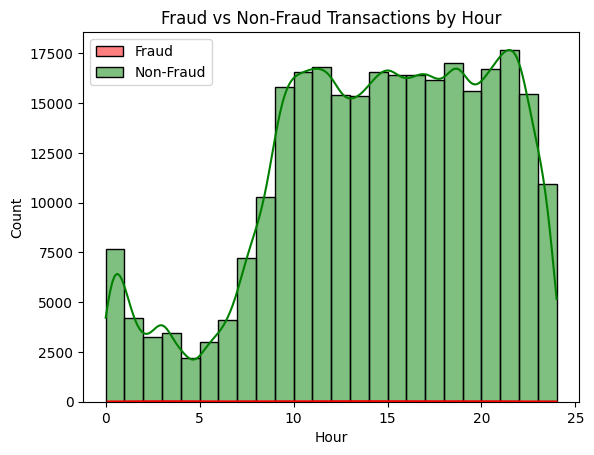

In [19]:
df['Hour'] = (df['Time'] / 3600) % 24  
sns.histplot(data=df[df['Class'] == 1], x='Hour', bins=24, color='red', label='Fraud', kde=True)
sns.histplot(data=df[df['Class'] == 0], x='Hour', bins=24, color='green', label='Non-Fraud', kde=True)
plt.legend()
plt.title('Fraud vs Non-Fraud Transactions by Hour')
plt.show()


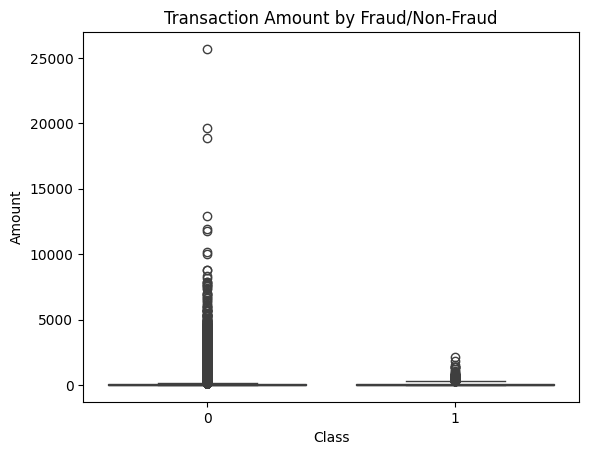

In [20]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Fraud/Non-Fraud')
plt.show()